                                         # gfs         nam
 Colima Sodar  18.966187 -103.86911     20,30       d1 13,13 d3: 5,5
 Art. Guilles  19.28     -103.70        40,40

In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from wrf import getvar, vinterp, ALL_TIMES

wrflist = Dataset('/mnt/sda2/exp2_201303_sodar/'+model+'_'+run+'_'+domain+'_20130301.nc')
uv, wdir = getvar(wrflist, "uvmet_wspd_wdir", units="m s-1", timeidx=ALL_TIMES)
uv.shape

(331, 31, 129, 90)

In [3]:
# Interpolate levels
interp_levels = [.020, .030, .040, .050, .100, .150, .200,
                 .250, .300, .350]

interp_uv = vinterp(wrflist, field=uv, vert_coord='ght_agl', interp_levels=interp_levels,
                    timeidx=ALL_TIMES, extrapolate=True, field_type='z', log_p=True)

interp_wdir = vinterp(wrflist, field=wdir, vert_coord='ght_agl', interp_levels=interp_levels,
                    timeidx=ALL_TIMES, extrapolate=True, field_type="z")

interp_uv.shape

(331, 10, 129, 90)

In [128]:
uv10, wdir10 = getvar(wrflist, "uvmet10_wspd_wdir", units="m s-1", timeidx=ALL_TIMES)

print(uv10.shape)
print(wdir10.shape)

(331, 129, 90)
(331, 129, 90)


In [18]:
xx, yy = 26, 25
#uv10[0,xx,yy]
# Lat 19.2792° y long -103.7745

<xarray.DataArray 'uvmet10_wspd_wdir' ()>
array(2.6475112438201904, dtype=float32)
Coordinates:
    wspd_wdir  <U4 'wspd'
    XLONG      float32 -103.773
    XLAT       float32 19.2801
    XTIME      float32 0.0
    Time       datetime64[ns] 2013-03-01
Attributes:
    FieldType:    104
    MemoryOrder:  XY
    description:  10m earth rotated wspd,wdir
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-103.56999969482422, moad_cen_la...

In [19]:
wind = interp_uv[:,:,xx,yy]
dirw = interp_wdir[:,:,xx,yy]
wind10 = uv10[:,xx,yy]
dirw10 = wdir10[:,xx,yy]
print(wind.shape, wind10.shape)

(331, 10) (331,)


In [129]:
wrftime = getvar(wrflist, "times", timeidx=ALL_TIMES)
utc2loc = np.timedelta64(6,'h')
wrftimes = pd.to_datetime(wrftime.values)-utc2loc
timeArraySod=np.arange(np.datetime64('2012-08-16 00:30'), np.datetime64('2013-04-11 00:30'),np.timedelta64(30,'m'))
date1, date2 = wrftimes[0], wrftimes[wrftimes.size-1]
print(wrftimes.size, date1, date2)
print(timeArraySod.size, timeArraySod[0], timeArraySod[timeArraySod.size-1])


331 2013-02-28 18:00:00 2013-03-07 15:00:00
11424 2012-08-16T00:30 2013-04-11T00:00


In [130]:
import pandas as pd
# Variables to store data temporarily #238 dias * 48dt = 11424 times
# (11424 lineas de los tiempos, 98 niveles)
spd=(pd.read_csv('wind', header=None, low_memory=False)).values.reshape((11424, 98))
drc=(pd.read_csv('direc', header=None, low_memory=False)).values.reshape((11424, 98))

# (11424 lineas de los tiempos, 98 niveles)
spd[spd>99.9] = np.nan
drc[drc>999 ] = np.nan
colNames=["spd_"+str((i+3)*10) for i in range(98)] 
import numpy.ma as ma
#spd = np.where(np.isnan(spd), ma.array(spd, mask=np.isnan(spd)).mean(axis=0), spd) 
sp=pd.DataFrame(data=spd, index=timeArraySod, columns=colNames, dtype=None)
dd=pd.DataFrame(data=drc, index=timeArraySod, columns=colNames, dtype=None)

In [131]:
import pandas as pd
wrf10,  dwrf10 = pd.Series(wind10, index=wrftimes), pd.Series(dirw10, index=wrftimes)
wrf20,  dwrf20 = pd.Series(wind[:,0], index=wrftimes), pd.Series(dirw[:,0], index=wrftimes)
wrf30,  dwrf30 = pd.Series(wind[:,1], index=wrftimes), pd.Series(dirw[:,1], index=wrftimes)
wrf40,  dwrf40 = pd.Series(wind[:,2], index=wrftimes), pd.Series(dirw[:,2], index=wrftimes)
wrf50,  dwrf50 = pd.Series(wind[:,3], index=wrftimes), pd.Series(dirw[:,3], index=wrftimes)
wrf100, dwrf100 = pd.Series(wind[:,4], index=wrftimes), pd.Series(dirw[:,4], index=wrftimes)
wrf150, dwrf150 = pd.Series(wind[:,5], index=wrftimes), pd.Series(dirw[:,5], index=wrftimes)
wrf200, dwrf200 = pd.Series(wind[:,6], index=wrftimes), pd.Series(dirw[:,6], index=wrftimes)
wrf250, dwrf250 = pd.Series(wind[:,7], index=wrftimes), pd.Series(dirw[:,7], index=wrftimes)
wrf300, dwrf300 = pd.Series(wind[:,8], index=wrftimes), pd.Series(dirw[:,8], index=wrftimes)
wrf350, dwrf350 = pd.Series(wind[:,9], index=wrftimes), pd.Series(dirw[:,9], index=wrftimes)

print(wrf10.shape, wrf20.shape)

(331,) (331,)


In [132]:
sod30  = pd.Series(sp[date1:date2].iloc[:,0], index=wrftimes)
sod50  = pd.Series(sp[date1:date2].iloc[:,2], index=wrftimes)
sod100 = pd.Series(sp[date1:date2].iloc[:,7], index=wrftimes)
sod150 = pd.Series(sp[date1:date2].iloc[:,12], index=wrftimes)
sod200 = pd.Series(sp[date1:date2].iloc[:,17], index=wrftimes)
sod250 = pd.Series(sp[date1:date2].iloc[:,22], index=wrftimes)
sod300 = pd.Series(sp[date1:date2].iloc[:,27], index=wrftimes)
sod350 = pd.Series(sp[date1:date2].iloc[:,32], index=wrftimes)
dsod30  = pd.Series(dd[date1:date2].iloc[:,0], index=wrftimes)
dsod50  = pd.Series(dd[date1:date2].iloc[:,2], index=wrftimes)
dsod100 = pd.Series(dd[date1:date2].iloc[:,7], index=wrftimes)
dsod150 = pd.Series(dd[date1:date2].iloc[:,12], index=wrftimes)
dsod200 = pd.Series(dd[date1:date2].iloc[:,17], index=wrftimes)
dsod250 = pd.Series(dd[date1:date2].iloc[:,22], index=wrftimes)
dsod300 = pd.Series(dd[date1:date2].iloc[:,27], index=wrftimes)
dsod350 = pd.Series(dd[date1:date2].iloc[:,32], index=wrftimes)

print(wrftimes[0], wrftimes[wrftimes.size-1])

2013-02-28 18:00:00 2013-03-07 15:00:00


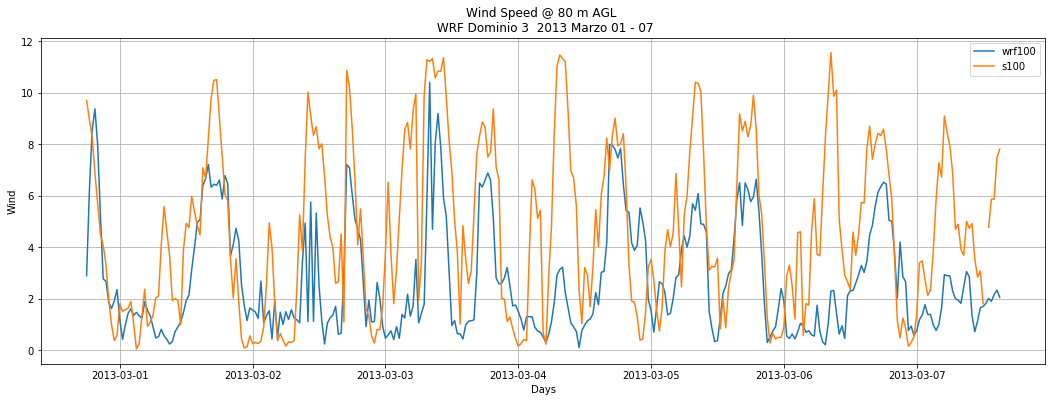

In [146]:
fig = plt.figure(figsize=[18,6])

plt.plot(wrf1['w100'], label='wrf100')
plt.plot(wrf1['s100'], label='s100')

plt.title('Wind Speed @ 80 m AGL \n WRF Dominio 3  2013 Marzo 01 - 07')
plt.ylabel('Wind')
plt.xlabel('Days')

plt.grid(True)
plt.legend()
#plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)
plt.show()

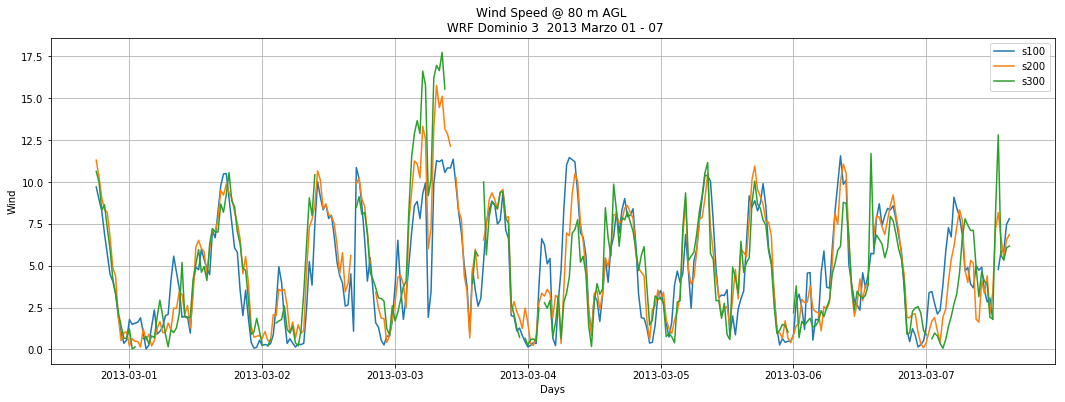

In [148]:
import pandas as pd
fig = plt.figure(figsize=[18,6])

plt.plot(wrf1['s100'], label='s100')
plt.plot(wrf1['s200'], label='s200')
plt.plot(wrf1['s300'], label='s300')

plt.title('Wind Speed @ 80 m AGL \n WRF Dominio 3  2013 Marzo 01 - 07')
plt.ylabel('Wind')
plt.xlabel('Days')

plt.grid(True)
plt.legend()
#plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)
plt.show()


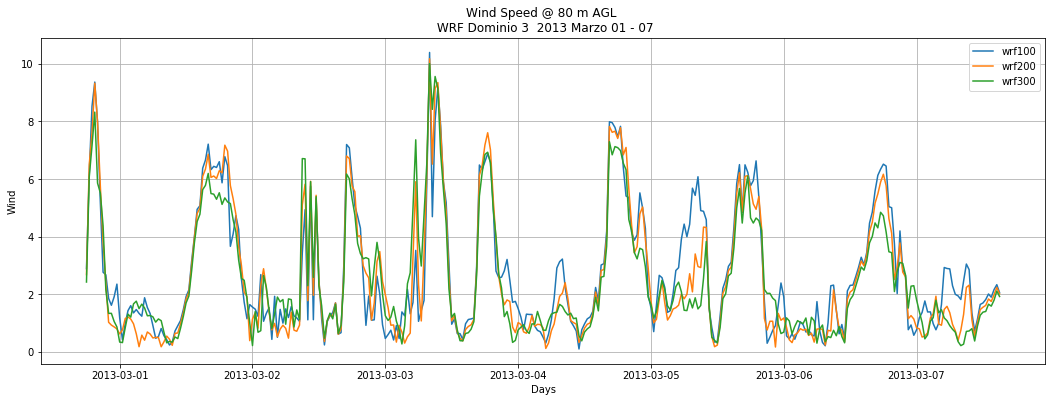

In [147]:
import pandas as pd
fig = plt.figure(figsize=[18,6])

plt.plot(wrf1['w100'], label='wrf100')
plt.plot(wrf1['w200'], label='wrf200')
plt.plot(wrf1['w300'], label='wrf300')

plt.title('Wind Speed @ 80 m AGL \n WRF Dominio 3  2013 Marzo 01 - 07')
plt.ylabel('Wind')
plt.xlabel('Days')

plt.grid(True)
plt.legend()
#plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)
plt.show()


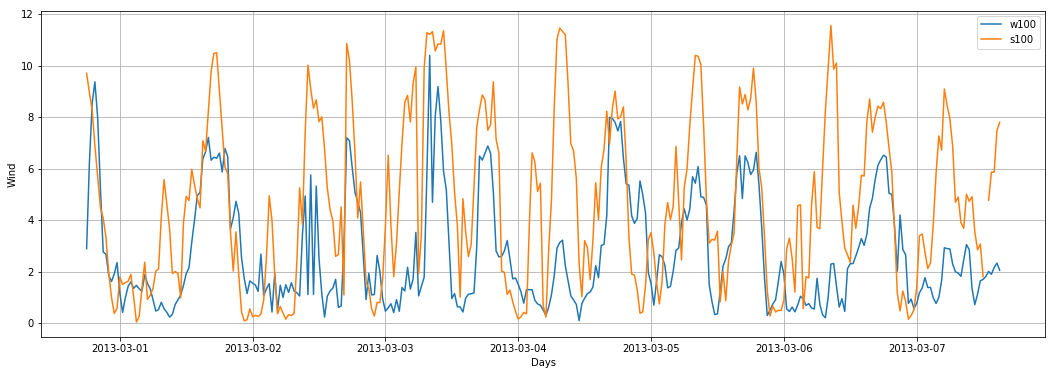

In [156]:
import pandas as pd
fig = plt.figure(figsize=[18,6])

ax1 = fig.add_subplot(111)
plt.plot(wrf1['w100'], label='w100')
plt.plot(wrf1['s100'], label='s100')

#ax2 = ax1.twinx()
#plt.plot(wrf1['sd100'], label='sd100')

#plt.title('Wind Speed @ 80 m AGL \n WRF Dominio 3  2013 Marzo 01 - 07')
plt.ylabel('Wind')
plt.xlabel('Days')

plt.grid(True)
plt.legend()
#plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)
plt.show()

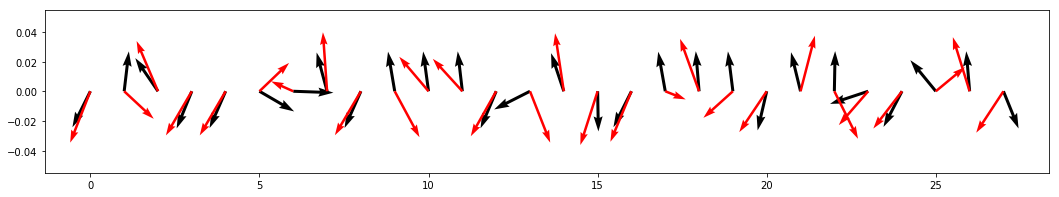

In [150]:
plt.figure(figsize=[18,3])
RS = np.radians(wrf1['sd100'][::12])
US, VS = np.sin(RS), np.cos(RS)
RW = np.radians(wrf1['wd100'][::12])
UW, VW = np.sin(RW), np.cos(RW)
arrows = plt.quiver(US, VS, scale=25, width=.003)
arroww = plt.quiver(UW, VW, color='red', scale_units='xy', scale=25, width=.0025)

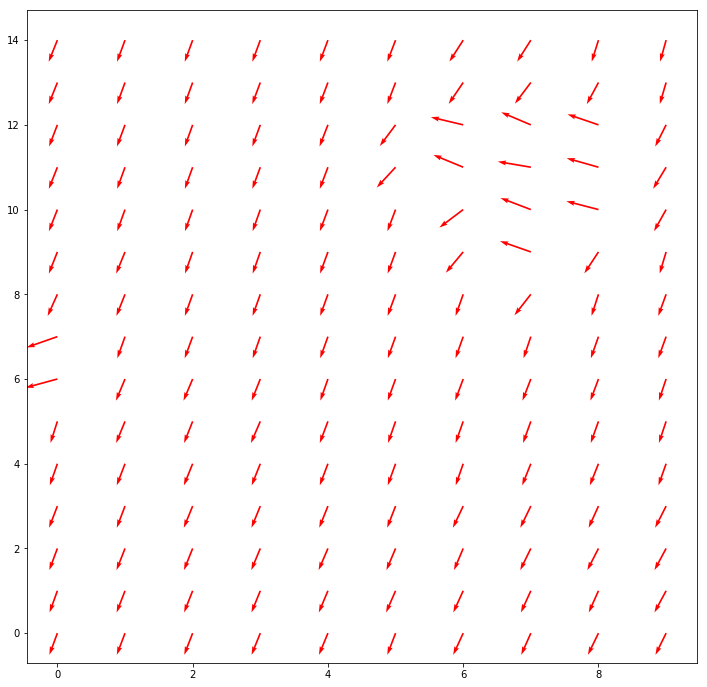

In [167]:
plt.figure(figsize=[12,12])
tt = 0
lvl = 0
interp_uv[tt,lvl,::9,::9].values
RW = interp_wdir[tt,lvl,::9,::9].values

RW = np.radians(RW)
UW, VW = np.sin(RW), np.cos(RW)
arroww = plt.quiver(UW, VW, color='red', scale_units='xy', scale=2, width=.0025)

In [163]:
RW.shape

(129, 90)